In [189]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [106]:
tables = pd.read_html('https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_do_Rio_de_Janeiro')
tables[6] = tables[6].set_index('Município de residência')
tables[7] = tables[7].set_index('Município de residência')
table = pd.concat([tables[6], tables[7]], axis=1)
adjacency = table.to_numpy()
func = lambda v: float(v.replace('%', '').replace(',','.'))/100
func = np.vectorize(func)
adjacency = func(adjacency)
table = pd.DataFrame(adjacency, index=table.index, columns=table.index)
populations = tables[33].set_index('Município[253]')['População[240]Estimativa 2021']
populations = populations.apply(lambda x: float(x.replace('\xa0', '')))

In [144]:
G = nx.from_pandas_adjacency(table, create_using=nx.DiGraph)

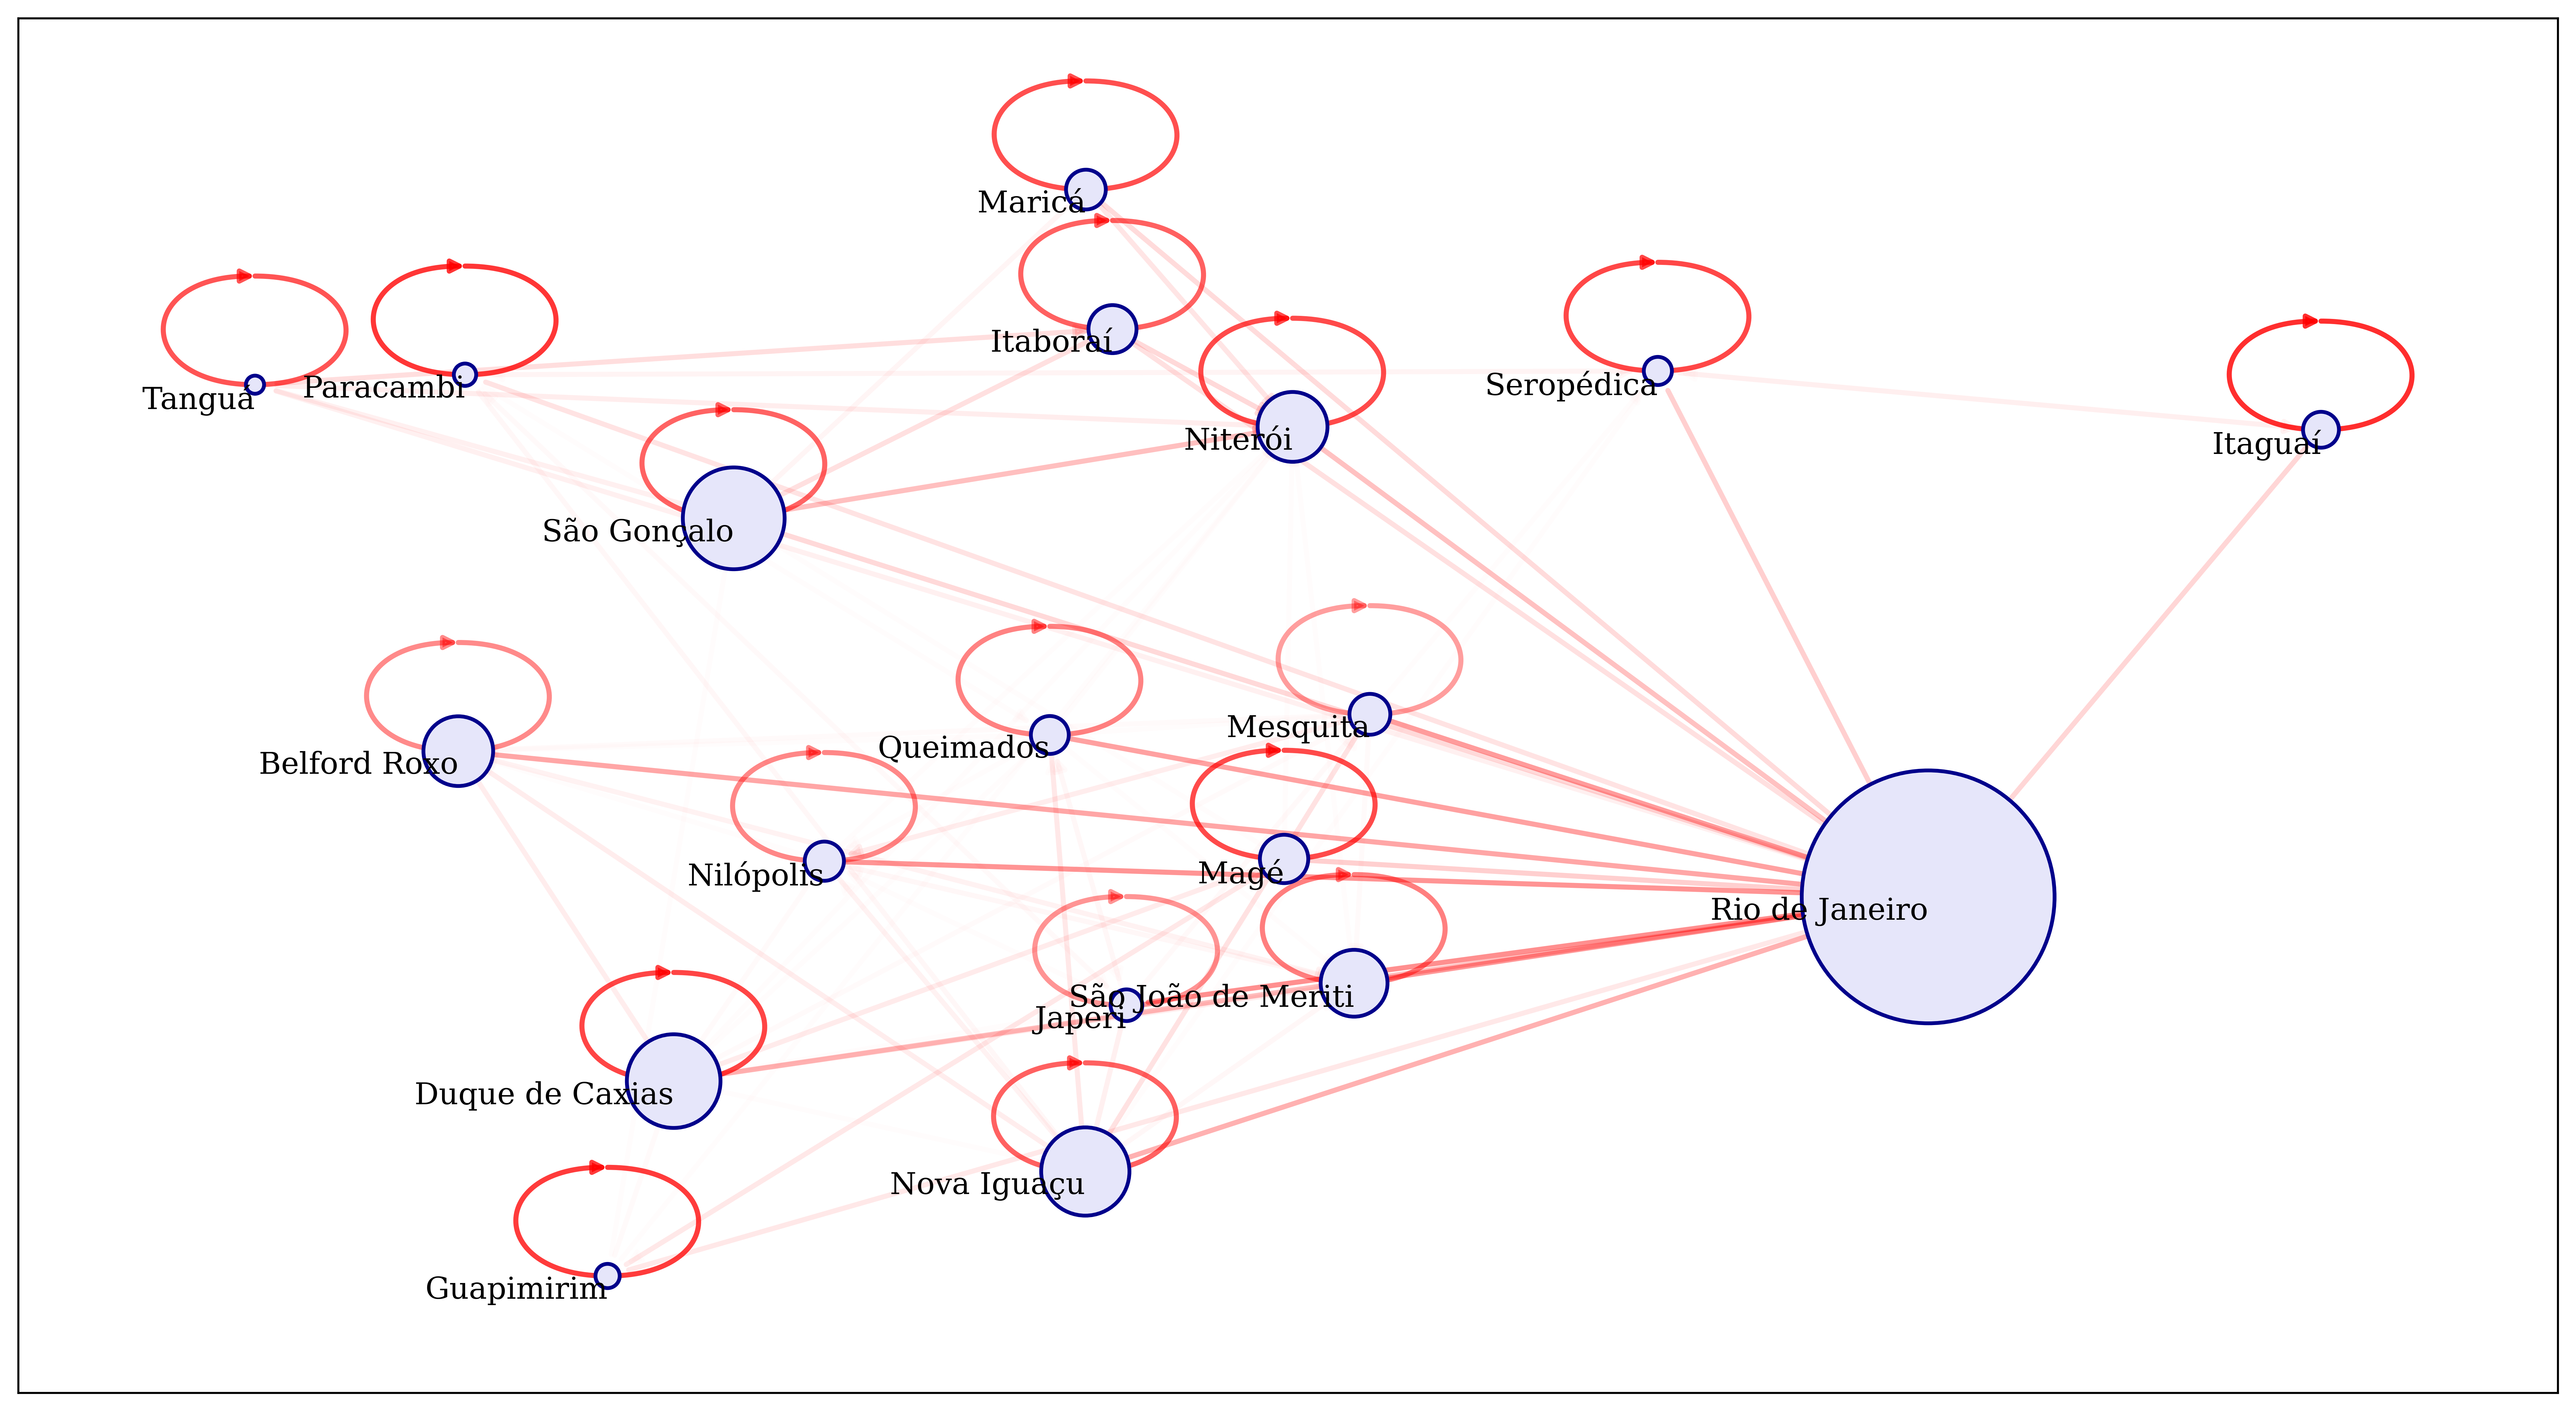

In [185]:
fig, ax = plt.subplots(figsize=(18,10))
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u,v in G.edges]
nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=weights, edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                       node_size=10000*populations.loc[list(G.nodes)]/max(populations.loc[list(G.nodes)]),
                       node_color='lavender',
                       node_shape='o',
                       edgecolors='darkblue',
                       linewidths=1.5)
nx.draw_networkx_labels(G, pos=pos, ax=ax, verticalalignment='top', horizontalalignment='right',
                        font_family='serif', clip_on=False)
plt.savefig('metropolitan_region_rio.png', bbox_inches='tight')
plt.show()

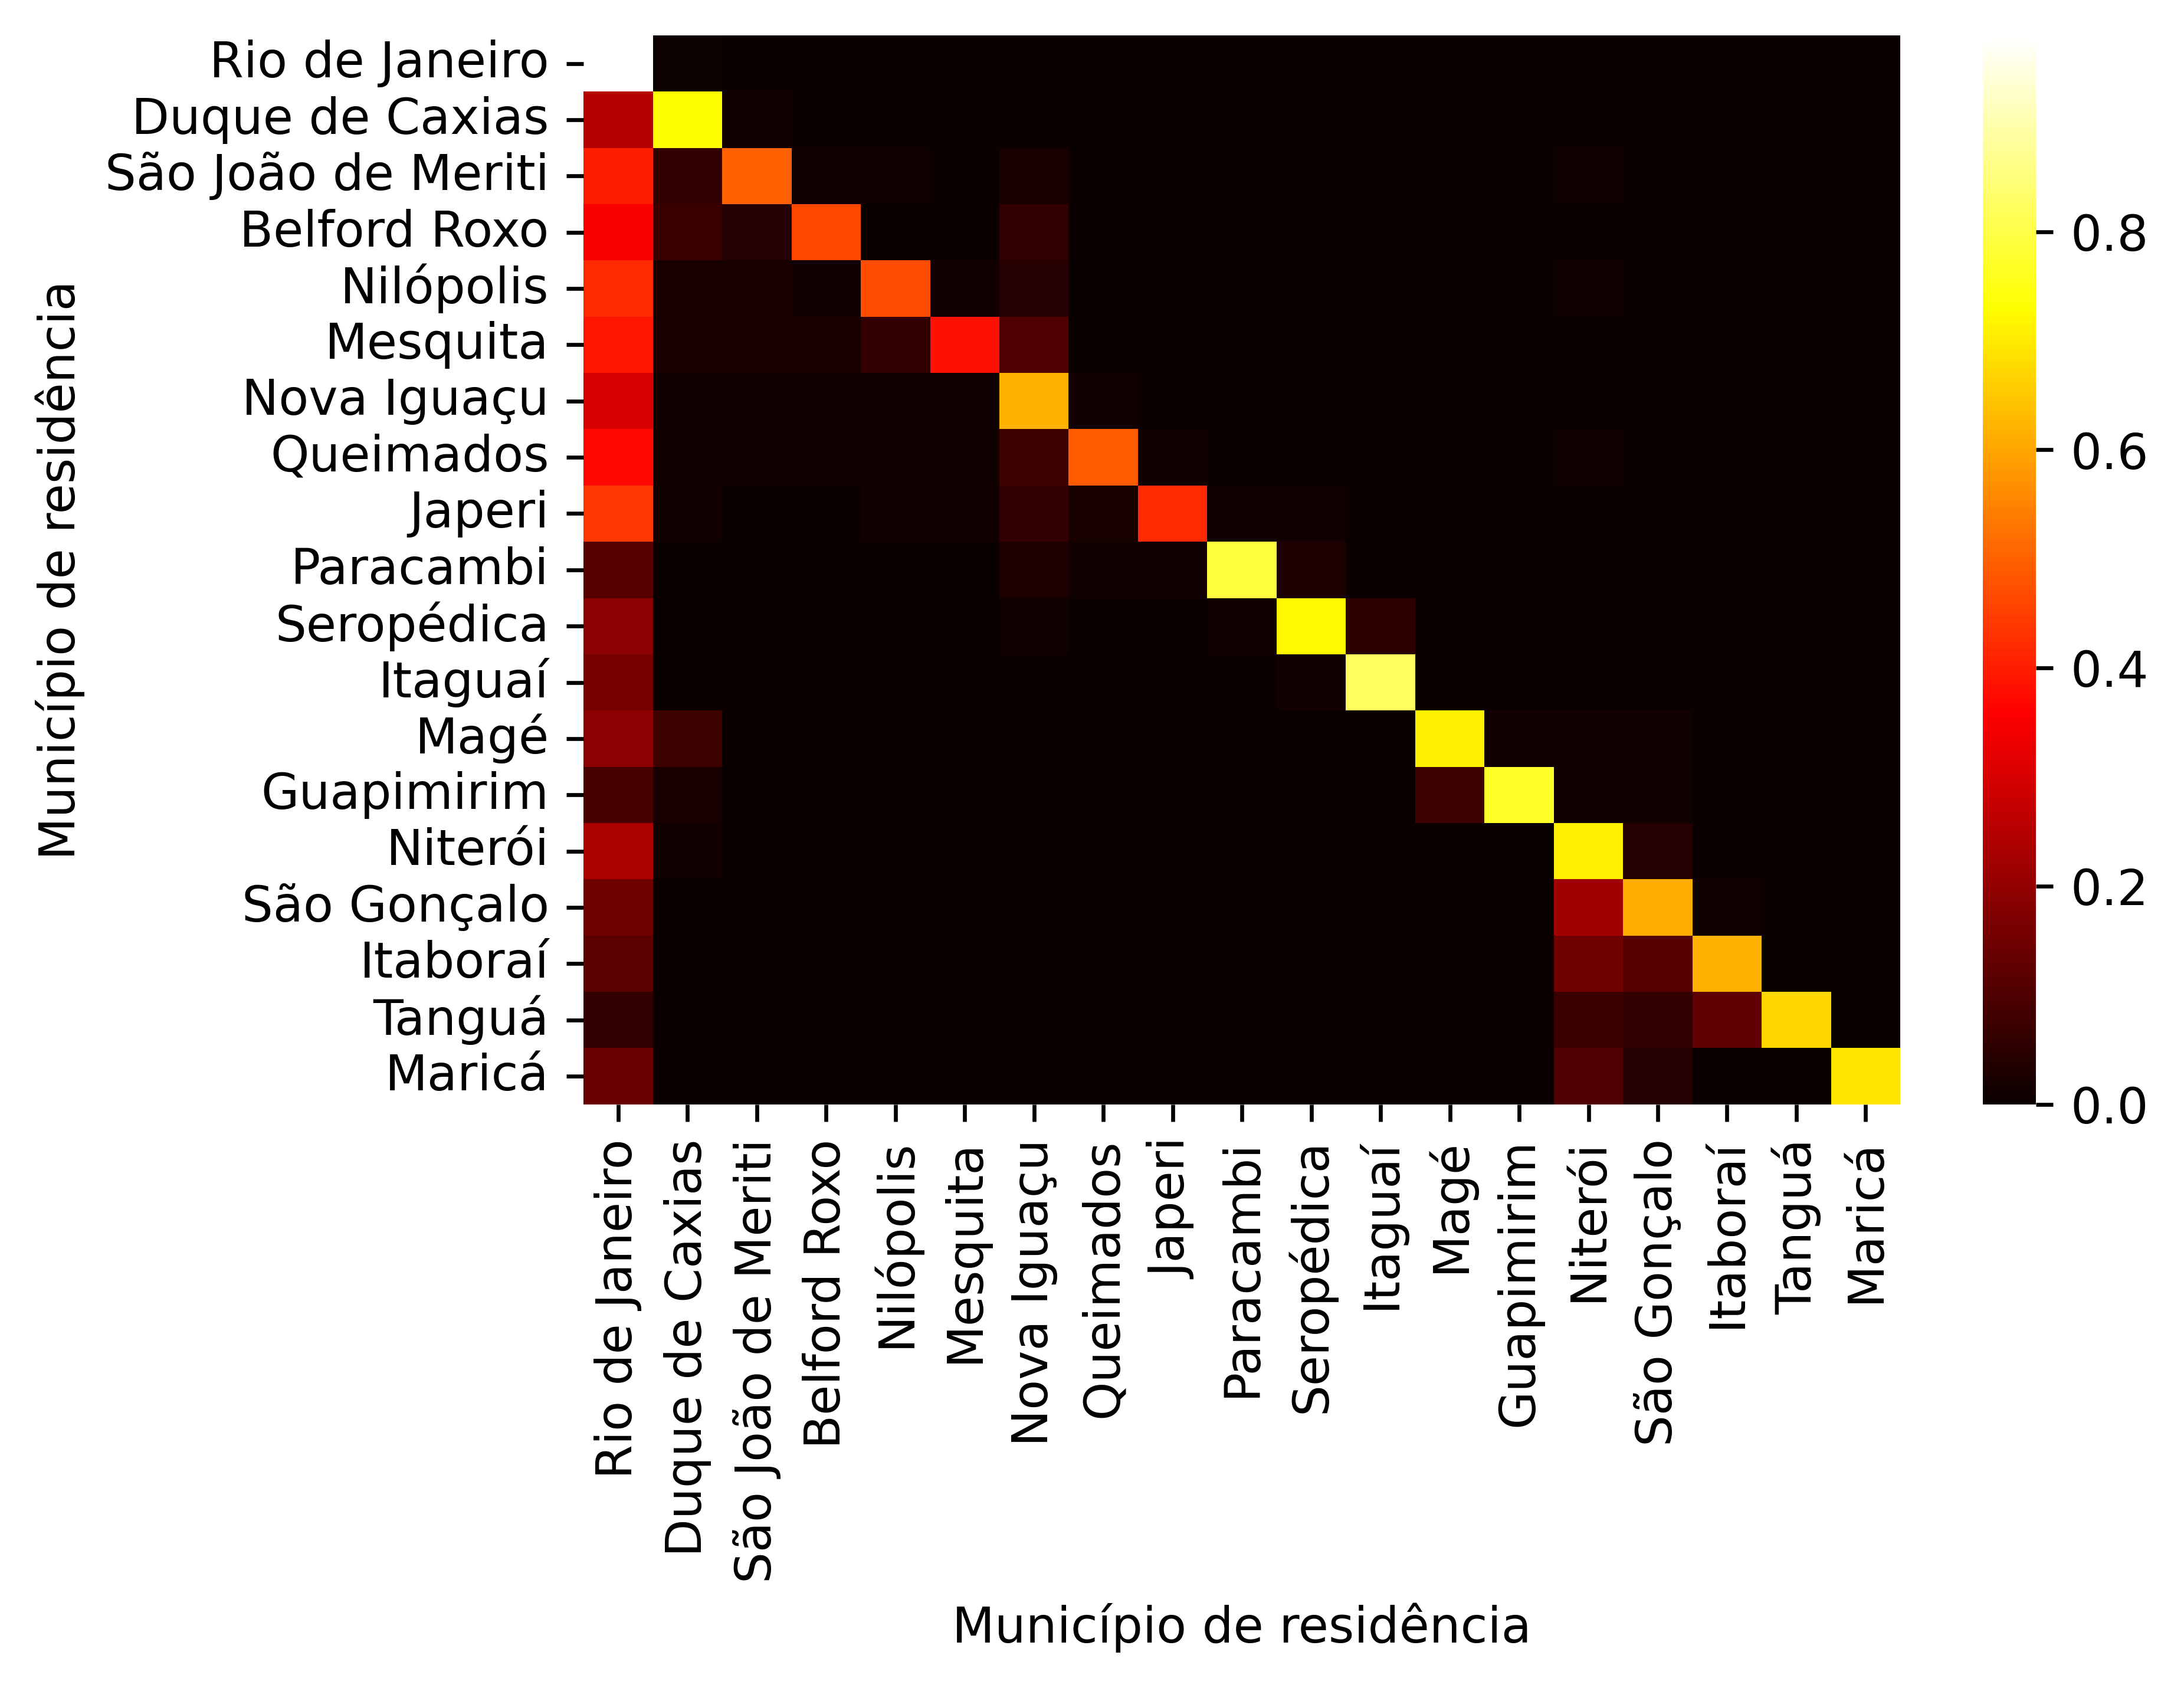

In [193]:
sns.heatmap(table, cmap='hot')
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()